<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# K-Nearest Neighbours (KNN)

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Predicting whether the passenger survived or not based on the information in the data

### b) Defining the Metric for Success

> We will be able to predict through 0 (not survived) and 1 (survived) if the class in which a particular passenger is in.\
With an accuracy of at least 80% of correctly identified predictions

### c) Understanding the context 

> Titanic, in full Royal Mail Ship (RMS) Titanic, British luxury passenger liner that sank on April 14–15, 1912, during its maiden voyage, en route to New York City from Southampton, England, killing about 1,500  passengers and ship personnel. \
One of the most famous tragedies in modern history, it inspired numerous stories, several films, and a musical and has been the subject of much scholarship and scientific speculation.

### d) Recording the Experimental Design

1. Define the question, the metric for success, the context, experimental design taken.

2. Read and explore the given dataset.

3. Define the appropriateness of the available data to answer the given question.

4. Find and deal with outliers, anomalies, and missing data within the dataset.

5. Perform univariate, bivariate and multivariate analysis recording your observations.

6. Implementing the Solution.

7. Challenging the solution.

8. Prediction

9. Conclusion

10. Recommendation

## 2. Reading the Data

In [1]:
# Importing our libraries
# ---
# 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error


In [2]:
# Loading the Data from the source i.e. csv
# ---
# 

train = pd.read_csv('train (5).csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C




## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
# ---------------
#
train.shape

(891, 12)

> The dataset has 891 rows and 12 columns

In [4]:
# Checking the columns that we have
# ----------
#
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Previewing the top of our dataset
# --------------
#
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Previewing the bottom of our dataset
# -----------------
#
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Checking whether each column has an appropriate datatype
#
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# Checking whether each column has an appropriate datatype
# -----------
#
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> Every column has the appropriate datatype

In [9]:
# Printing the unique values
 
columns = train.columns
for i in columns:
  print('Unique values in', i , 'are :')
  print(train[i].unique())
  print('                                                                           ')
  print('***************************************************************************')


Unique values in PassengerId are :
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238

## 5. Tidying the Dataset

In [10]:
# Identifying the Missing Data
# ---------
#
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> We having missing values in age, cabin and embarked columns

In [11]:
# Replacing our missing values with mean

train['Age'].fillna(train['Age'].mean(), inplace = True)

# Drop the Cabin because it has too many missing values and the column is not relevent to our analysis
train.drop(['Cabin'], axis=1, inplace=True)

# Dropping the rest of the missing values in embarked
train = train.dropna()

In [12]:
# Confirming that all the missing the values have been dropped
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

> No more missing values

In [13]:
# Dropping the passengerid, name and ticket columns as they are not pertinent in predicting the survival of passengers
# 
train.drop(['PassengerId', 'Name', 'Ticket', 'Parch'], axis=1, inplace=True)
train.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


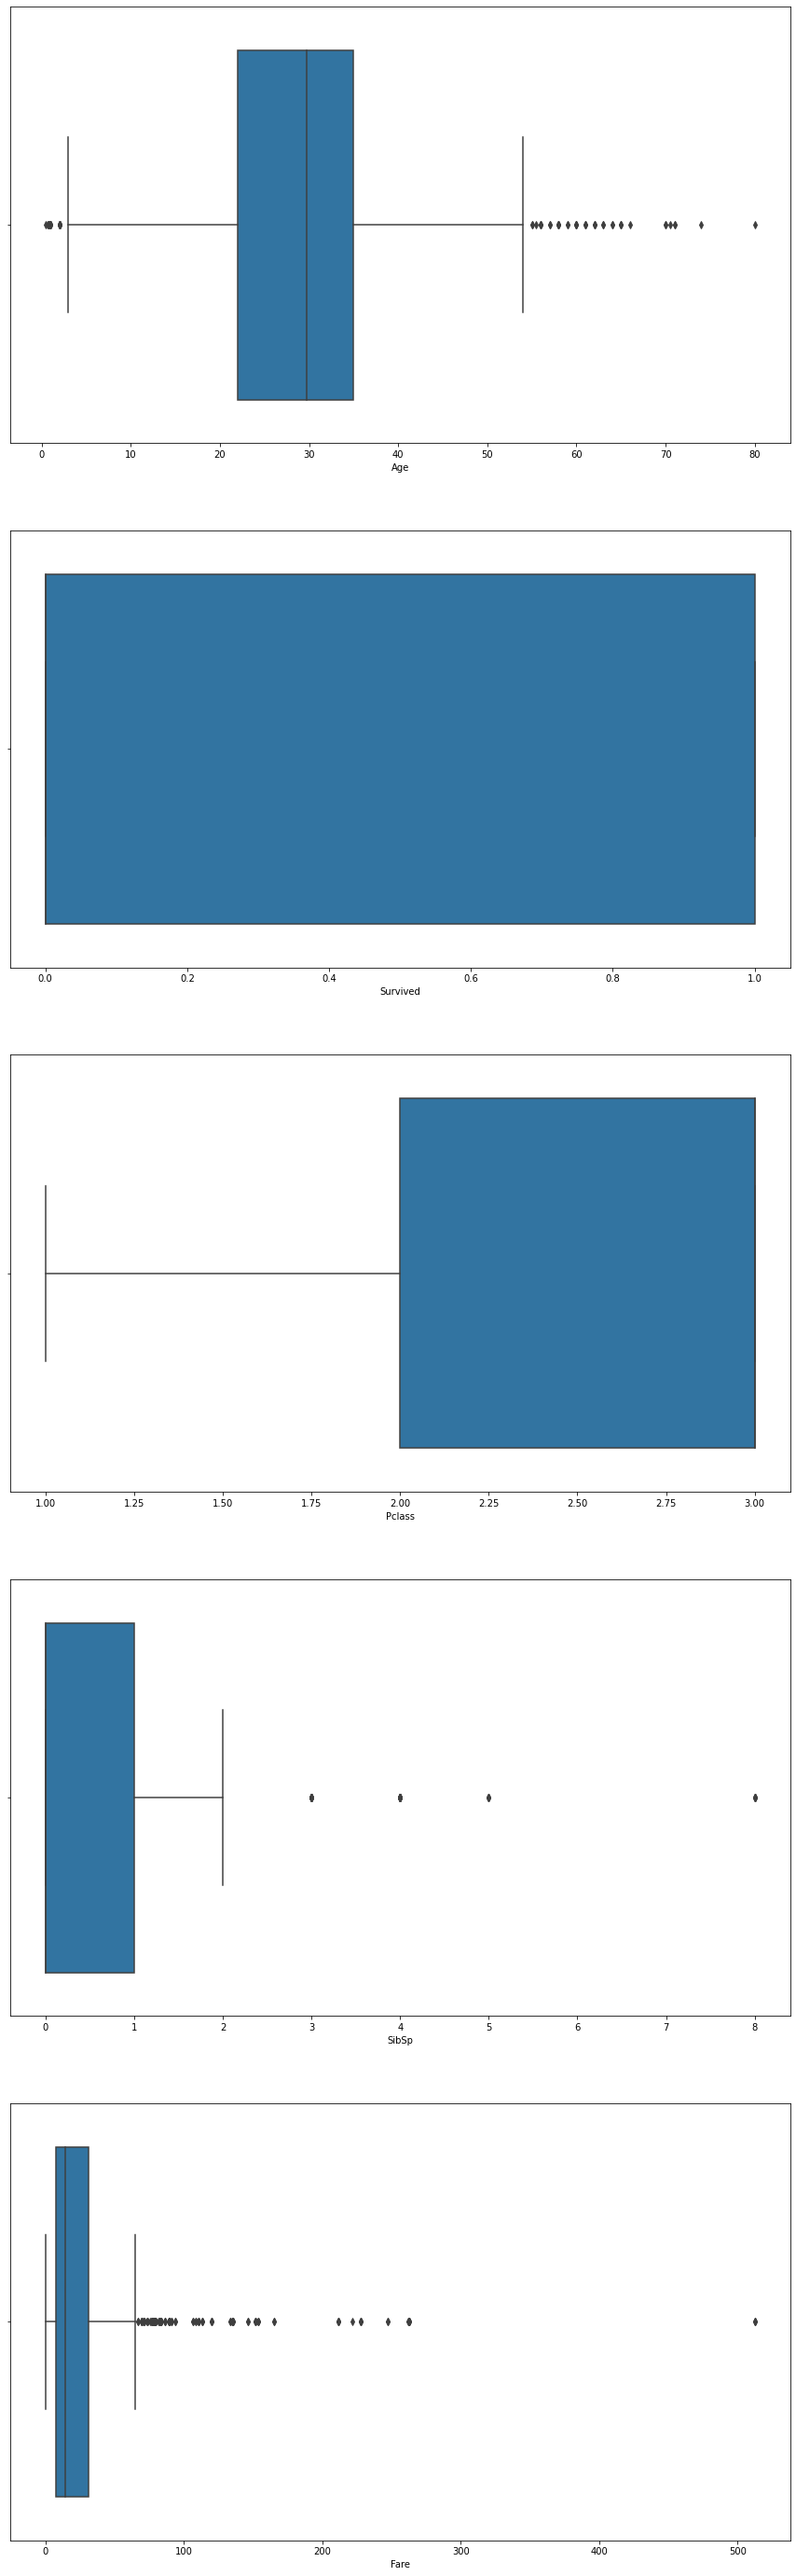

In [15]:
# Checking for Outliers
# ------------------
#
# Checking for Outliers
# We chose thebelow column because they are the ones mostly likely to have outliers than the other 0 or 1 columns

col_names = ['Age', 'Survived', 'Pclass', 'SibSp', 'Fare']
fig, ax = plt.subplots(len(col_names), figsize = (15,50))
for i, col_val in enumerate(col_names):

    sns.boxplot(x = train[col_val], ax=ax[i])
    #ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    
plt.show()

> There are outliers presents

In [16]:
# Removing outliers based on the IQR range and stores the result in the data frame 
# ---
# 
Q1= train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3-Q1
IQR

train_df = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]


# Printing the shape of our new dataset versus the old one 
# ---
# 
print(train_df.shape)
print(train.shape)

(692, 7)
(889, 7)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if __name__ == '__main__':


> The shape changed ie the number of rows decreased indicating that outliers have been removed.\
> We dropped 332 records indicating we removed the outliers

In [18]:
# Checking for Anomalies
# -------------
#
def check_Anomalies(Df,col_name):
  q1 = Df[col_name].quantile(0.25)
  q3 = Df[col_name].quantile(0.75)
  
  #Interquartile range points
  iqr_points = q3-q1 
  return iqr_points

# Identifying the particular columns for removing outliers
iqr_points_age = check_Anomalies(train_df,'Age')
iqr_points_sur = check_Anomalies(train_df,'Survived')
iqr_points_class = check_Anomalies(train_df,'Pclass')
iqr_points_sib = check_Anomalies(train_df,'SibSp')
iqr_points_far = check_Anomalies(train_df,'Fare')

In [19]:
# Printing the anomalies
print('Age ', iqr_points_age)
print('Survived ', iqr_points_sur)
print('Pclass ', iqr_points_class)
print('SibSp ', iqr_points_sib)
print('Fare ', iqr_points_far)

Age  10.0
Survived  1.0
Pclass  1.0
SibSp  0.0
Fare  16.183300000000003


In [20]:
# Previewing the dataset to understand the encoding part below 
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.000000,1,7.2500,S
2,1,3,female,26.000000,0,7.9250,S
3,1,1,female,35.000000,1,53.1000,S
4,0,3,male,35.000000,0,8.0500,S
5,0,3,male,29.699118,0,8.4583,Q


In [21]:
# Label encoding and changing the dtypes

from sklearn.preprocessing import LabelEncoder
for col in train_df.columns:
    if train_df[col].dtypes == 'object':
        le = LabelEncoder()        
        train_df[col] = le.fit_transform(train_df[col].astype(str))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [22]:
# confirming and copying the cleaned dataset
#
train_df.head()

# Making a copy of the clean dataset
train_clean = train_df.copy()
train_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,1,22.000000,1,7.2500,2
2,1,3,0,26.000000,0,7.9250,2
3,1,1,0,35.000000,1,53.1000,2
4,0,3,1,35.000000,0,8.0500,2
5,0,3,1,29.699118,0,8.4583,1


## 6. Exploratory Analysis

### Univariate Analysis

In [23]:
# Checking the statistical description
# ------------
#
train_clean.describe()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
count,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,0.343931,2.489884,0.686416,29.111937,0.274566,16.838565,1.598266
std,0.475362,0.724723,0.464285,9.554062,0.501564,13.437232,0.737970
min,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,23.000000,0.000000,7.854200,1.750000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,10.500000,2.000000
75%,1.000000,3.000000,1.000000,33.000000,0.000000,24.037500,2.000000
max,1.000000,3.000000,1.000000,54.000000,2.000000,65.000000,2.000000


In [24]:
# Finding the measures of central tendencies

anomalies_columns = train_clean.columns
for column in anomalies_columns:
  print('\n')
  print(column + ', Mean: '+ str(train_clean[column].mean()))
  print(column + ', Mode: '+ str(train_clean[column].mode()))
  print(column + ', Median: '+ str(train_clean[column].median()))
  print(column + ', Standard deviation: '+ str(train_clean[column].std()))
  print(column + ', Variance: '+ str(train_clean[column].var()))
  print(column + ', Skewness: '+ str(train_clean[column].skew()))
  print(column + ', Kurtosis: '+ str(train_clean[column].kurt()))
  print(column + ', Max: '+ str(train_clean[column].max()))
  print(column + ', Min: '+ str(train_clean[column].min()))
  print(column + ', Range: '+ str(train_clean[column].max() - train_clean[column].min()))
  print(column + ', Quantile:\n'+ str(train_clean[column].quantile([0.25,0.5,0.75])))



Survived, Mean: 0.3439306358381503
Survived, Mode: 0    0
dtype: int64
Survived, Median: 0.0
Survived, Standard deviation: 0.47536186029247535
Survived, Variance: 0.22596889822072286
Survived, Skewness: 0.6585372206097115
Survived, Kurtosis: -1.5708772208616497
Survived, Max: 1
Survived, Min: 0
Survived, Range: 1
Survived, Quantile:
0.25    0.0
0.50    0.0
0.75    1.0
Name: Survived, dtype: float64


Pclass, Mean: 2.489884393063584
Pclass, Mode: 0    3
dtype: int64
Pclass, Median: 3.0
Pclass, Standard deviation: 0.7247228031901168
Pclass, Variance: 0.5252231414637408
Pclass, Skewness: -1.0513708172093799
Pclass, Kurtosis: -0.3308014014526357
Pclass, Max: 3
Pclass, Min: 1
Pclass, Range: 2
Pclass, Quantile:
0.25    2.0
0.50    3.0
0.75    3.0
Name: Pclass, dtype: float64


Sex, Mean: 0.6864161849710982
Sex, Mode: 0    1
dtype: int64
Sex, Median: 1.0
Sex, Standard deviation: 0.4642849444117503
Sex, Variance: 0.21556050960742207
Sex, Skewness: -0.805352505996096
Sex, Kurtosis: -1.3553328

> If the variance is high, especially as a ratio to the mean ,that tells you that the data have some very large dis-similarities amongst its members. \
For the columns Fare and Age they have their variance higher than mean.\
The others have the appropriate ratio.\
If one considers the mean to be a sort of centre of the data, the variance tells you how scattered around the centre of mass the points are.

> The columns PClass, Sex and Embarked have negative skewness indivcating left skew.\
The rest of the columns have a positive skewness indicating that they are rightly skewed.

> For Kurtosis, the column Sex, PClass and Survived have a values less than 0 indicating that it is a platykurtic distribution that is their distribution has light tails. \
TThe columns having a value close to 0 showing a mesokurtic distributions with a normal distributions are Age and Embarked.\
Fare and SibSp have values greater than 0 showing that their distribution has heavier tails making them a leptokurtic distribution. 

<Figure size 1000x300 with 0 Axes>

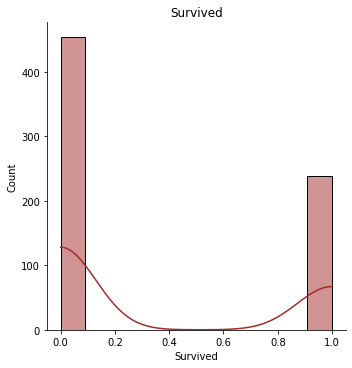

<Figure size 1000x300 with 0 Axes>

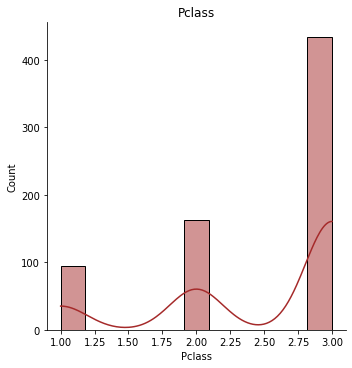

<Figure size 1000x300 with 0 Axes>

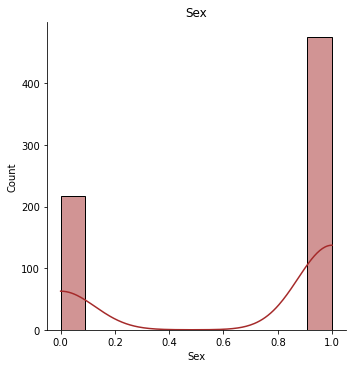

<Figure size 1000x300 with 0 Axes>

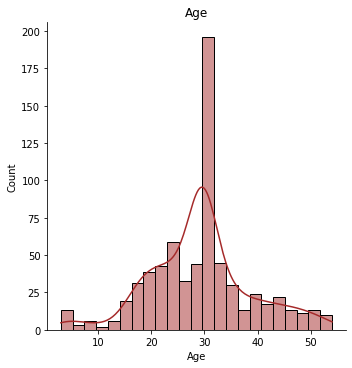

<Figure size 1000x300 with 0 Axes>

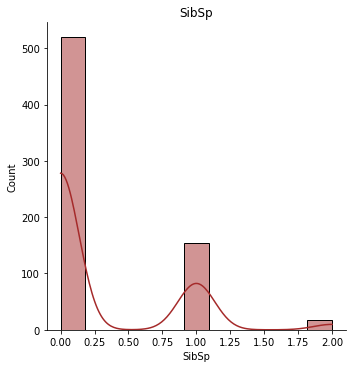

<Figure size 1000x300 with 0 Axes>

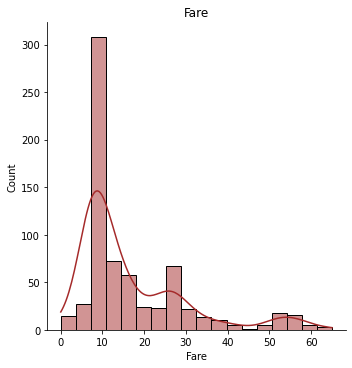

<Figure size 1000x300 with 0 Axes>

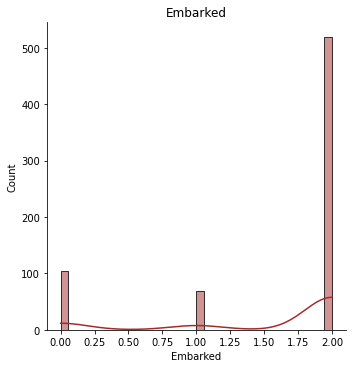

In [25]:
# Plotting the price histogram
#
col = train_clean.columns
for i in col:
  plt.figure(figsize = (10,3), dpi=100)
  sns.displot(train_clean[i], kde = True, color = 'brown')
  plt.title(i, color = 'Black')
  plt.show()

> The above description goes hand in hand with the histogram distributions

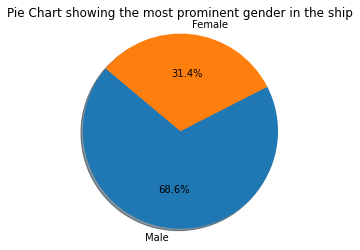

In [26]:
# Plotting a pie chart for sex column
# ------

vals = train_clean['Sex'].value_counts()
vals
names = ['Male','Female']
plt.pie(vals, labels = names, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart showing the most prominent gender in the ship')
plt.show()

> The male gender were the most on board

### Bivariate Analysis

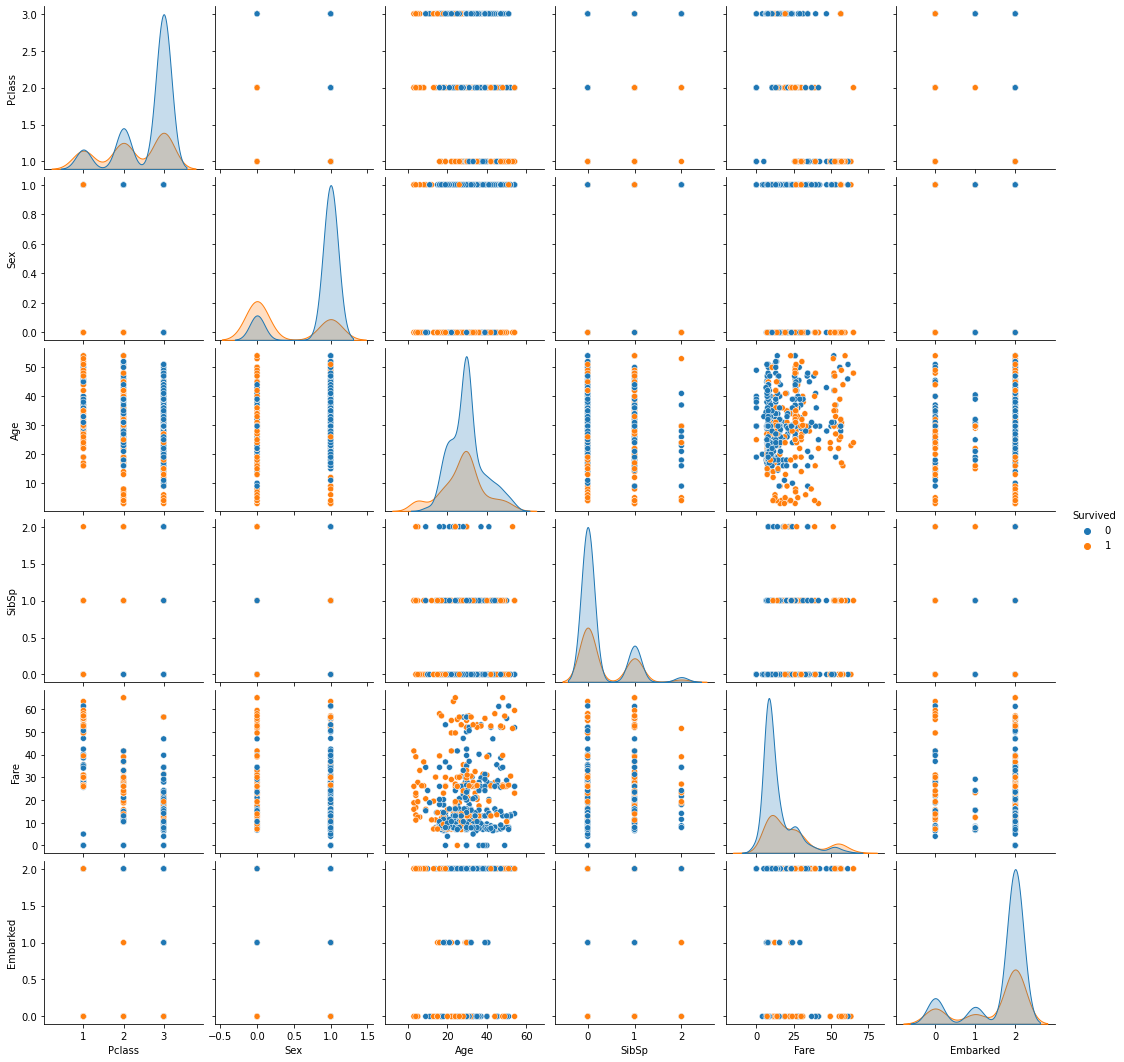

In [28]:
# Plotting the bivariate summaries and recording our observations
# Plotting pairplots

sns.pairplot(train_clean,hue='Survived')


plt.show()

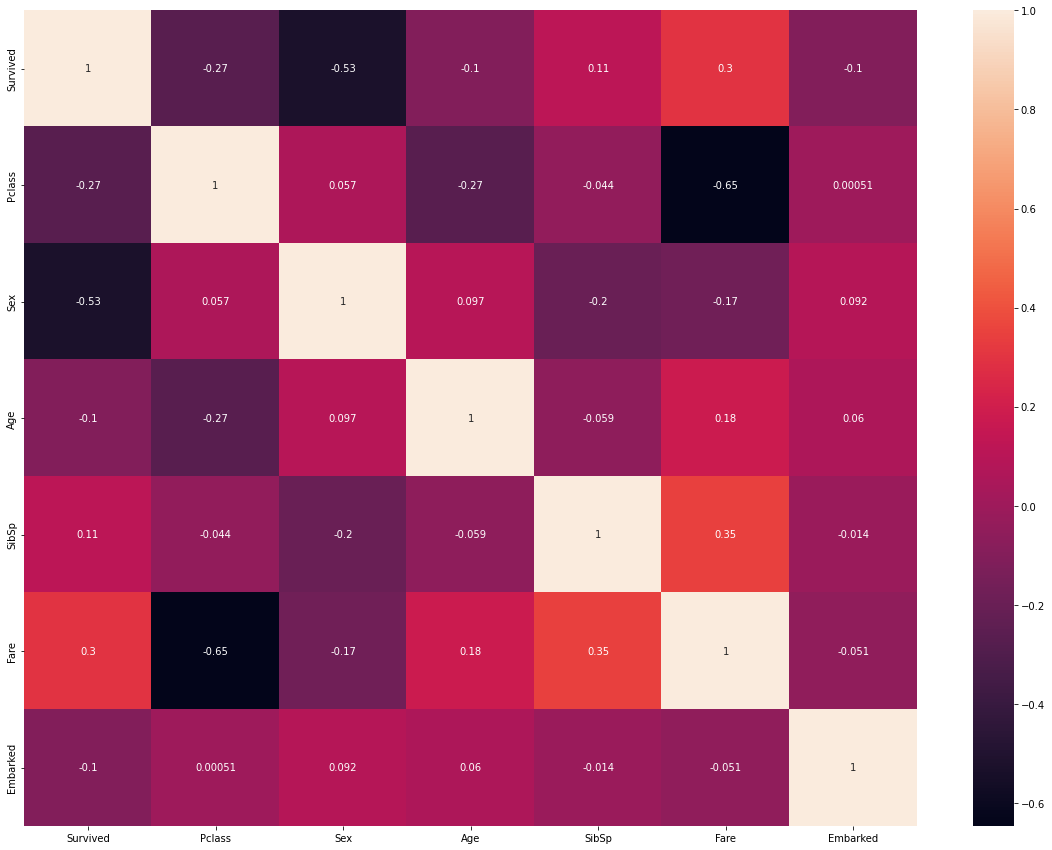

In [29]:
# Plotting a correlation matrix

plt.subplots(figsize=(20,15))
sns.heatmap(train_clean.corr(), annot=True)
plt.show()


> For the positive correlation we have Fare and SibSp with a correlation of 0.35 showing that when one increases the other also increases.

> For the negative correlation we have Fare and PClass with a value of -0.65 indicating that whenone increases the other decreases, this can show us that PClass 1 was the most expensive

## 7. Implementing the Solution

### 80 - 20 Split

In [31]:
# Splitting our data
# ---
# 
X = train_clean[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']]
y = train_clean['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.5159331840071079
RMSE value for k=  2 is: 0.5431059093556048
RMSE value for k=  3 is: 0.4798081151232537
RMSE value for k=  4 is: 0.53644178078582
RMSE value for k=  5 is: 0.45676371739136623
RMSE value for k=  6 is: 0.5159331840071079
RMSE value for k=  7 is: 0.44881939454625097
RMSE value for k=  8 is: 0.4945748846704234
RMSE value for k=  9 is: 0.48724744426466315
RMSE value for k=  10 is: 0.48724744426466315
RMSE value for k=  11 is: 0.48724744426466315
RMSE value for k=  12 is: 0.48724744426466315
RMSE value for k=  13 is: 0.47225160956190815
RMSE value for k=  14 is: 0.5017953379128578
RMSE value for k=  15 is: 0.5089133578079825
RMSE value for k=  16 is: 0.5017953379128578
RMSE value for k=  17 is: 0.5017953379128578
RMSE value for k=  18 is: 0.5228587715282481
RMSE value for k=  19 is: 0.5159331840071079
RMSE value for k=  20 is: 0.48724744426466315
RMSE value for k=  21 is: 0.4945748846704234
RMSE value for k=  22 is: 0.5089133578079825
RMSE value fo

> Picking the value with the lowest rmse for best results and that is k= 7

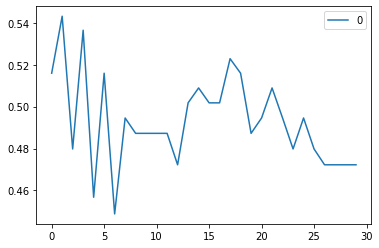

In [35]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()


In [36]:
# Training our algorithm
# ---
# 
clf = KNeighborsClassifier(7)
clf = clf.fit(X_train, y_train)

In [37]:
# Making our prediction
# ---
# 

y_pred = clf.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)* 100)

MSE: 0.2014388489208633
Accuracy: 79.85611510791367


> The MSE value is close to 0 and thats a good sign. \
With an acuracy of 79.85% to predict the data correct

In [38]:
# Plotting the confusion matrix and the classification report
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[74 10]
 [18 37]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        84
           1       0.79      0.67      0.73        55

    accuracy                           0.80       139
   macro avg       0.80      0.78      0.78       139
weighted avg       0.80      0.80      0.80       139



The classification report shows the precision in predicting not survived cases is 80% while the precision in predicting survival cases is 79%.\
The model has been able to predict 88% of the not survived cases and 67% of the survived cases correctly.



### 70 - 30 Split

In [39]:
# Splitting our data
# ---
# 
X1 = train_clean[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']]
y1 = train_clean['Survived']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [40]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1_train)

X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

In [41]:
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X1_train, y1_train)  #fit the model
    pred=model.predict(X1_test) #make prediction on test set
    error = sqrt(mean_squared_error(y1_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.5325916316971626
RMSE value for k=  2 is: 0.5280588545286916
RMSE value for k=  3 is: 0.46513025470953173
RMSE value for k=  4 is: 0.49516896883014355
RMSE value for k=  5 is: 0.46513025470953173
RMSE value for k=  6 is: 0.49516896883014355
RMSE value for k=  7 is: 0.45993310550389993
RMSE value for k=  8 is: 0.4853626716970755
RMSE value for k=  9 is: 0.47535411901185676
RMSE value for k=  10 is: 0.4853626716970755
RMSE value for k=  11 is: 0.4803844614152614
RMSE value for k=  12 is: 0.4902903378454601
RMSE value for k=  13 is: 0.4803844614152614
RMSE value for k=  14 is: 0.5095246653650681
RMSE value for k=  15 is: 0.4853626716970755
RMSE value for k=  16 is: 0.5095246653650681
RMSE value for k=  17 is: 0.5095246653650681
RMSE value for k=  18 is: 0.49516896883014355
RMSE value for k=  19 is: 0.4702699715629801
RMSE value for k=  20 is: 0.46513025470953173
RMSE value for k=  21 is: 0.4702699715629801
RMSE value for k=  22 is: 0.4702699715629801
RMSE value 

> Picking the value with the lowest rmse for best results and that is k= 27

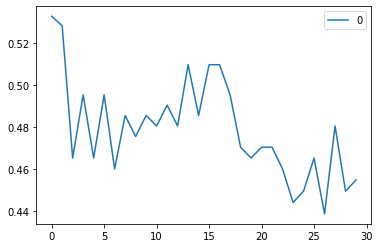

In [42]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()


In [43]:
# Training our algorithm
# ---
# 
clf = KNeighborsClassifier(27)
clf1 = clf.fit(X1_train, y1_train)

In [44]:
# Making our prediction
# ---
# 

y_pred1 = clf1.predict(X1_test)
print("MSE:", mean_squared_error(y1_test, y_pred1))

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred1)* 100)

MSE: 0.19230769230769232
Accuracy: 80.76923076923077


> The MSE value is closer to 0 and thats a good sign.\
With an acuracy of 80.76% to predict the data correct

In [45]:
# Plotting the confusion matrix and the classification report
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y1_test, y_pred1))
print(classification_report(y1_test, y_pred1))

[[112  17]
 [ 23  56]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       129
           1       0.77      0.71      0.74        79

    accuracy                           0.81       208
   macro avg       0.80      0.79      0.79       208
weighted avg       0.81      0.81      0.81       208



> The classification report shows the precision in predicting not survived cases is 83% while the precision in predicting survival cases is 77%.\
The model has been able to predict 87% of the not survived cases and 71% of the survived cases correctly.

### 60 - 40 Split

In [46]:
# Splitting our data
# ---
# 
X2 = train_clean[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']]
y2 = train_clean['Survived']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=0)

In [47]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X2_train)

X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

In [48]:
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X2_train, y2_train)  #fit the model
    pred=model.predict(X2_test) #make prediction on test set
    error = sqrt(mean_squared_error(y2_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.49546681485336497
RMSE value for k=  2 is: 0.5133594317212689
RMSE value for k=  3 is: 0.488126159936589
RMSE value for k=  4 is: 0.49546681485336497
RMSE value for k=  5 is: 0.47310328132601664
RMSE value for k=  6 is: 0.48067341450088774
RMSE value for k=  7 is: 0.4692724224778129
RMSE value for k=  8 is: 0.49181018321877956
RMSE value for k=  9 is: 0.488126159936589
RMSE value for k=  10 is: 0.49181018321877956
RMSE value for k=  11 is: 0.48067341450088774
RMSE value for k=  12 is: 0.48067341450088774
RMSE value for k=  13 is: 0.488126159936589
RMSE value for k=  14 is: 0.49546681485336497
RMSE value for k=  15 is: 0.49909665689542315
RMSE value for k=  16 is: 0.49909665689542315
RMSE value for k=  17 is: 0.4844141200576128
RMSE value for k=  18 is: 0.47310328132601664
RMSE value for k=  19 is: 0.4844141200576128
RMSE value for k=  20 is: 0.47690336872860645
RMSE value for k=  21 is: 0.4844141200576128
RMSE value for k=  22 is: 0.47310328132601664
RMSE val

> Picking the value with the lowest rmse for best results and that is k= 23

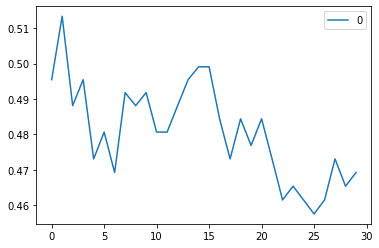

In [49]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()


In [50]:
# Training our algorithm
# ---
# 
clf = KNeighborsClassifier(23)
clf2 = clf.fit(X2_train, y2_train)

In [51]:
# Making our prediction
# ---
# 

y_pred = clf2.predict(X2_test)
print("MSE:", mean_squared_error(y2_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y_pred)* 100)

MSE: 0.21299638989169675
Accuracy: 78.70036101083032


> The MSE value is a bit further to 0.\
With an acuracy of 78.70% to predict the data correct

In [52]:
# Plotting the confusion matrix and the classification report
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y2_test, y_pred))
print(classification_report(y2_test, y_pred))

[[153  23]
 [ 36  65]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       176
           1       0.74      0.64      0.69       101

    accuracy                           0.79       277
   macro avg       0.77      0.76      0.76       277
weighted avg       0.78      0.79      0.78       277



> The classification report shows the precision in predicting not survived cases is 81% while the precision in predicting survival cases is 74%.\
The model has been able to predict 87% of the not survived cases and 64% of the survived cases correctly.

## 8. Challenging the solution

### Optimizing the Model Performance

> To improve the performance of our model we shall use apply the dimensionality reduction technique that is LDA.\
This will help make the distance more meaningful by reducing the dimensions, that is, by removing the redundant and dependent features by transforming the features from higher dimensional space to a space with lower dimensions.

> We are going to optimize the 70-30 split model as it gave us the best accuracy

In [62]:
# We already performed our feature scaling, the next is to perform the LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X12_train = lda.fit_transform(X1_train, y1_train)
X12_test = lda.transform(X1_test)


In [58]:
# Training our algorithm
# ---
# 
clf = KNeighborsClassifier(27)
clf12 = clf.fit(X1_train, y1_train)

In [59]:
# Making our prediction
# ---
# 

y_pred12 = clf12.predict(X12_test)
print("MSE:", mean_squared_error(y1_test, y_pred12))

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred12)* 100)

MSE: 0.23557692307692307
Accuracy: 76.4423076923077


> Using the LDA decreased our accuracy from 80.76% to 76.44%,therefore we'll go with initial model ie the 70-30 split

## Predicting indexes on X_test

In [64]:
# Previewing the dataset to identify the indexes we want to use prediction
train_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,1,22.000000,1,7.2500,2
2,1,3,0,26.000000,0,7.9250,2
3,1,1,0,35.000000,1,53.1000,2
4,0,3,1,35.000000,0,8.0500,2
5,0,3,1,29.699118,0,8.4583,1


In [69]:
# Predicting index 3 the actual survived value is 1
clf1.predict([[1, 0, 35.000000, 1, 53.1000, 2]])

array([1])

In [70]:
# Predicting index 5 the actual survived value is 0
clf1.predict([[3, 1, 29.699118, 0, 8.4583, 1]])

array([0])

## Conclusion

> Out of the 3 splits that is the 80-20, 70-30, 60-40 the split with the highest accuracy was the 70 - 30 split.\
We used this split as our scikit-learn model

> The dimensionality reduction technique LDA lowered the accuracy therefore we continued to use the scikit-learn model.

> The scikit-learn model gave the actual value for prediction of survived 

## Recommendation

> We can use the GridSearch CV to find another alternative of the k value and compare the results to that of our initial k value

> We could also use another optimization technique like distance metric where we would use manhattan as the distance metric

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

> Yes we had sufficient data to answer our question

### b). Do we need other data to answer our question?

> We do not need anymore data to our analysis was made the the current data

### c). Did we have the right question?

> Yes, we had the correct question